In [1]:
import pandas as pd

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import pyplot as plt
plt.rcParams["figure.autolayout"] = True

In [2]:
!ls

datasets           images             logos              pr_2021_2022.ipynb


In [5]:
table = pd.read_csv('datasets/PR_2021_2022.csv')
table.head()

,team,round_1,round_2,round_3,round_4,round_5,round_6,round_7,round_8,round_9,...,round_29,round_30,round_31,round_32,round_33,round_34,round_35,round_36,round_37,round_38
0,Manchester City,13,9,7,5,5,2,3,3,3,...,1,1,1,1,1,1,1,1,1,1
1,Liverpool,3,3,5,3,2,1,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,Chelsea,2,2,4,2,1,3,1,1,1,...,3,3,3,3,3,3,3,3,3,3
3,Tottenham Hotspur,10,5,1,7,7,11,8,5,6,...,7,5,4,4,4,5,5,5,4,4
4,Arsenal,17,19,20,16,13,10,11,12,10,...,4,4,5,5,5,4,4,4,5,5


In [6]:
table['team'] = table['team'].str.lower().str.replace(' ', '_')
table = table.set_index('team')
table.head()

,round_1,round_2,round_3,round_4,round_5,round_6,round_7,round_8,round_9,round_10,...,round_29,round_30,round_31,round_32,round_33,round_34,round_35,round_36,round_37,round_38
team,,,,,,,,,,,,,,,,,,,,,
manchester_city,13,9,7,5,5,2,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
liverpool,3,3,5,3,2,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
chelsea,2,2,4,2,1,3,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
tottenham_hotspur,10,5,1,7,7,11,8,5,6,9,...,7,5,4,4,4,5,5,5,4,4
arsenal,17,19,20,16,13,10,11,12,10,6,...,4,4,5,5,5,4,4,4,5,5


In [12]:
table.index

Index(['manchester_city', 'liverpool', 'chelsea', 'tottenham_hotspur',
       'arsenal', 'manchester_united', 'west_ham_united', 'leicester_city',
       'brighton', 'wolverhampton', 'newcastle_united', 'crystal_palace',
       'brentford', 'aston_villa', 'southampton', 'everton', 'leeds_united',
       'burnley', 'watford', 'norwich_city'],
      dtype='object', name='team')

In [7]:
def get_image(path):
    return OffsetImage(plt.imread(path, format="png"), zoom=.25)

In [8]:
team_logo = {'manchester_city': ['logos/manchester_city.png'], 
             'liverpool': ['logos/liverpool.png'], 
             'chelsea': ['logos/chelsea.png'],
             'tottenham_hotspur': ['logos/tottenham_hotspur.png'],
             'arsenal': ['logos/arsenal.png'],
             'manchester_united': ['logos/manchester_united.png'],
             'west_ham_united': ['logos/west_ham_united.png'],
             'leicester_city': ['logos/leicester_city.png'],
             'brighton': ['logos/brighton.png'],
             'wolverhampton': ['logos/wolverhampton.png'],
             'newcastle_united': ['logos/newcastle_united.png'],
             'crystal_palace': ['logos/crystal_palace.png'],
             'brentford': ['logos/brentford.png'],
             'aston_villa': ['logos/aston_villa.png'],
             'southampton': ['logos/southampton.png'],
             'everton': ['logos/everton.png'],
             'leeds_united': ['logos/leeds_united.png'],
             'burnley': ['logos/burnley.png'],
             'watford': ['logos/watford.png'],
             'norwich_city': ['logos/norwich_city.png'],
            }

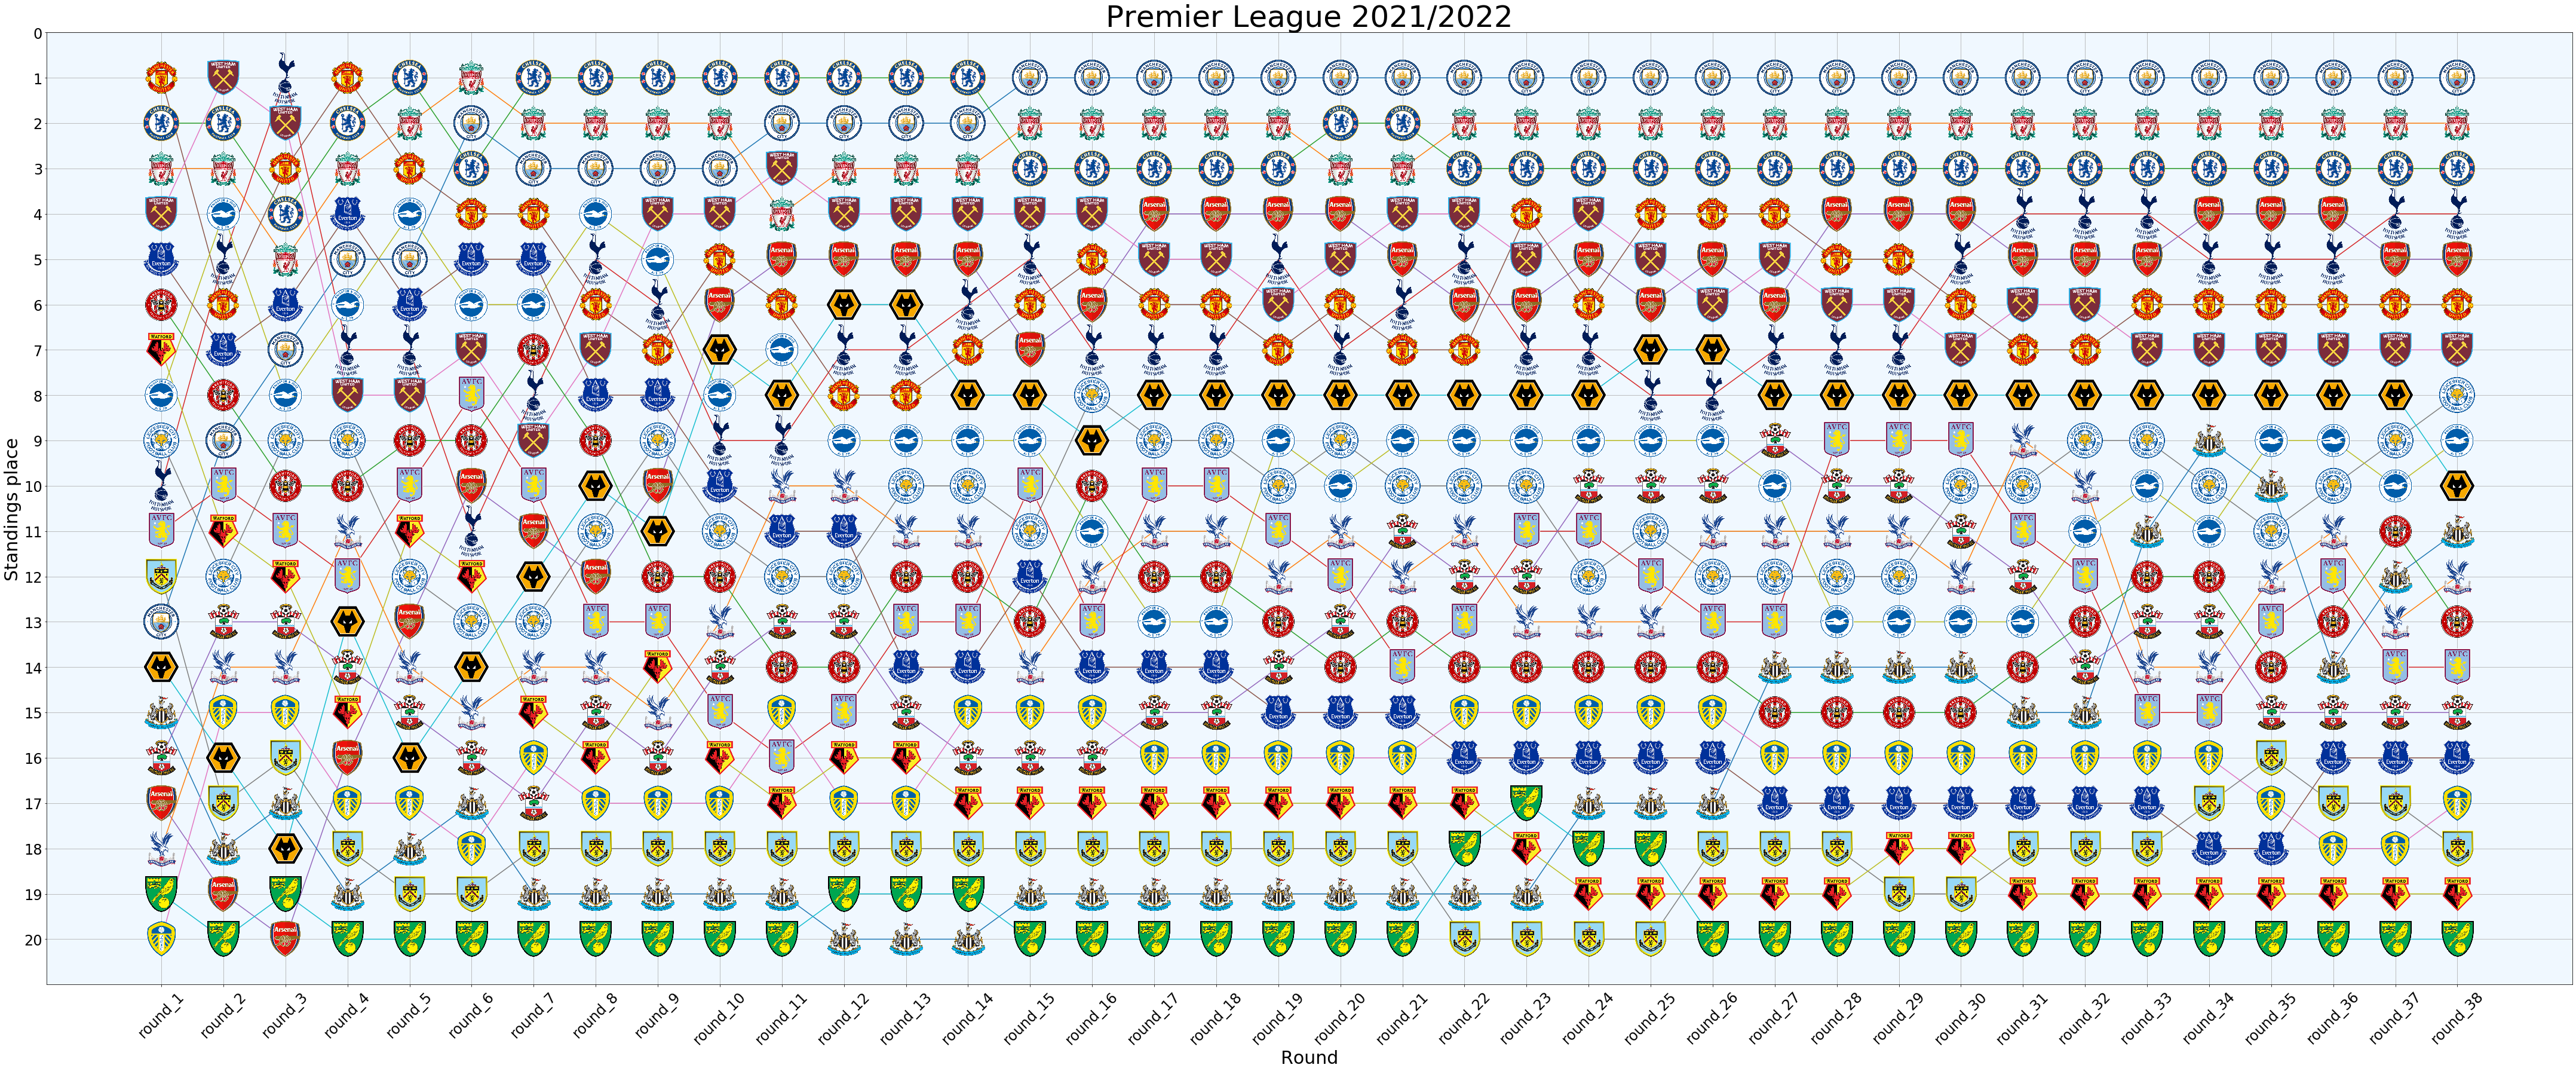

In [11]:
fig, ax = plt.subplots(figsize=(60, 25))
color = 'aliceblue'  # ivory, aliceblue, lightskyblue, aquamarine
ax.set_facecolor(color)

for team in table.index:
    paths = team_logo[team] * len(table.loc[team, 'round_1':])
    
    x = list(range(38))
    y = table.loc[team, 'round_1':]
    
    for x0, y0, path in zip(x, y, paths):
        ab = AnnotationBbox(get_image(path), (x0, y0), frameon=False)
        ax.add_artist(ab)
        
    plt.plot(table.loc[team, 'round_1':])
    

plt.title('Premier League 2021/2022', fontsize=50)
plt.grid(True)

plt.yticks(list(range(21)), fontsize=24)
plt.ylim(21, 0)
plt.ylabel('Standings place', fontsize=30)

plt.xticks(fontsize=24, rotation=45)
plt.xlabel('Round', fontsize=30);


plt.savefig(f'images/pr_2021_2022_{color}.png', dpi=200)